# (6주차) 4월11일 

- toc:true
- branch: master
- badges: true
- comments: true
- author: 최규빈

### 강의영상 

### imports 

In [1]:
import tensorflow as tf 
import tensorflow.experimental.numpy as tnp 

In [2]:
tnp.experimental_enable_numpy_behavior()

In [3]:
import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"'+s + '; }')

### $x \to \hat{y}$ 가 되는 과정을 그림으로 그리기

`-` 단순회귀분석의 예시
- $\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i, \quad i=1,2,\dots,n$

(표현1)

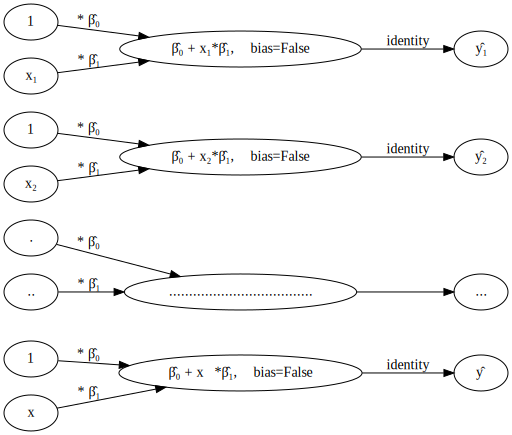

In [4]:
#collapse
gv(''' 
    "1" -> "β̂₀ + xₙ*β̂₁,    bias=False"[label="* β̂₀"]
    "xₙ" -> "β̂₀ + xₙ*β̂₁,    bias=False"[label="* β̂₁"]
    "β̂₀ + xₙ*β̂₁,    bias=False" -> "ŷₙ"[label="identity"]

    "." -> "...................................."[label="* β̂₀"]
    ".." -> "...................................."[label="* β̂₁"]
    "...................................." -> "..."[label=" "]

    "1 " -> "β̂₀ + x₂*β̂₁,    bias=False"[label="* β̂₀"]
    "x₂" -> "β̂₀ + x₂*β̂₁,    bias=False"[label="* β̂₁"]
    "β̂₀ + x₂*β̂₁,    bias=False" -> "ŷ₂"[label="identity"]
    
    "1  " -> "β̂₀ + x₁*β̂₁,    bias=False"[label="* β̂₀"]
    "x₁" -> "β̂₀ + x₁*β̂₁,    bias=False"[label="* β̂₁"]
    "β̂₀ + x₁*β̂₁,    bias=False" -> "ŷ₁"[label="identity"]
''')


`-` 표현1의 소감? 
- 교수님이 고생해서 만든것 같음 
- 그런데 그냥 다 똑같은 그림의 반복이라 사실 고생한 의미가 없음. 

(표현2)

`-` 그냥 아래와 같이 그리고 "모든 $i=1,2,3,\dots,n$에 대하여 $\hat{y}_i$을 아래의 그림과 같이 그린다"고 하면 될것 같다. 

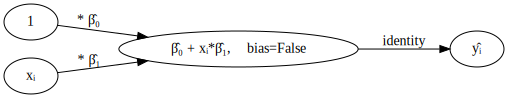

In [5]:
#collapse
gv(''' 
    "1" -> "β̂₀ + xᵢ*β̂₁,    bias=False"[label="* β̂₀"]
    "xᵢ" -> "β̂₀ + xᵢ*β̂₁,    bias=False"[label="* β̂₁"]
    "β̂₀ + xᵢ*β̂₁,    bias=False" -> "ŷᵢ"[label="identity"]

''')


(표현3) 

`-` 그런데 "모든 $i=1,2,3,\dots,n$에 대하여 $\hat{y}_i$을 아래의 그림과 같이 그린다" 라는 언급자체도 반복할 필요가 없을 것 같다. (어차피 당연히 그럴테니까) 그래서 단순히 아래와 같이 그려도 무방할듯 하다. 

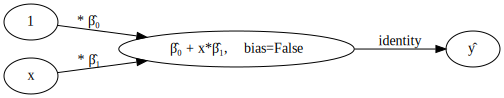

In [6]:
gv(''' 
    "1" -> "β̂₀ + x*β̂₁,    bias=False"[label="* β̂₀"]
    "x" -> "β̂₀ + x*β̂₁,    bias=False"[label="* β̂₁"]
    "β̂₀ + x*β̂₁,    bias=False" -> "ŷ"[label="identity"]

''')


(표현4)

`-` 위의 모델은 아래와 같이 쓸 수 있다. ($\beta_0$를 바이어스로 표현) 

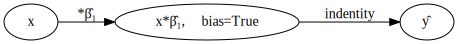

In [7]:
#collapse
gv('''
"x" -> "x*β̂₁,    bias=True"[label="*β̂₁"] ;
"x*β̂₁,    bias=True" -> "ŷ"[label="indentity"] ''')


- 실제로는 이 표현을 많이 사용함 

(표현5)

`-` 벡터버전으로 표현하면 아래와 같다. 이 경우에는 ${\bf X}=[1,x]$에 포함된 1이 bias의 역할을 해주므로 `bias = False` 임. 

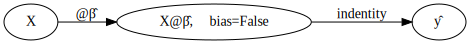

In [8]:
#collapse
gv('''
"X" -> "X@β̂,    bias=False"[label="@β̂"] ;
"X@β̂,    bias=False" -> "ŷ"[label="indentity"] ''')


- 저는 이걸 좋아해요 

(표현5)'

`-` 딥러닝에서는 $\hat{\boldsymbol{\beta}}$ 대신에 $\hat{{\bf W}}$을 라고 표현한다. 

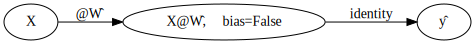

In [9]:
#collapse
gv('''
"X" -> "X@Ŵ,    bias=False"[label="@Ŵ"] ;
"X@Ŵ,    bias=False" -> "ŷ"[label="identity"] ''')


`-` 실제로는 표현4 혹은 표현5를 외우면 된다. 

### Layer의 개념 

`-` (표현4) 혹은 (표현5)의 그림은 레이어로 설명할 수 있다. 

`-` 레이어는 항상 아래와 같은 규칙을 가진다. 
- 첫 동그라미는 레이어의 입력이다. 
- 첫번째 화살표는 선형변환을 의미한다. 
- 두번째 동그라미는 선형변환의 결과이다. (이때 bias가 false인지 true인지에 따라서 실제 수식이 조금 다름) 
- 두번째 화살표는 두번째 동그라미에 어떠한 함수 $f$를 취하는 과정을 의미한다. (우리의 그림에서는 $f(x)=x$) 
- 세번째 동그라미는 레이어의 최종출력이다. 

`-` 엄청 복잡한데, 결국 레이어를 만들때 위의 그림들을 의미하도록 하려면 아래의 4개의 요소만 필요하다. 
1. 레이어의 입력차원 
2. 선형변환의 결과로 얻어지는 차원
3. 선형변환에서 바이어스를 쓸지? 안쓸지? 
4. 함수 $f$

`-` 주목: 1,2가 결정되면 자동으로 $\hat{{\bf W}}$의 차원이 결정된다. 

(예시)
- 레이어의 입력차원=2, 선형변환의 결과로 얻어지는 차원=1: $\hat{\bf W}$는 (2,1) 매트릭스 
- 레이어의 입력차원=20, 선형변환의 결과로 얻어지는 차원=5: $\hat{\bf W}$는 (20,5) 매트릭스 
- 레이어의 입력차원=2, 선형변환의 결과로 얻어지는 차원=50: $\hat{\bf W}$는 (2,50) 매트릭스 


`-` 주목2: 이중에서 절대 생략불가능 것은 "2. 선형변환의 결과로 얻어지는 차원" 이다. 
- 레이어의 입력차원: 실제 레이어에 데이터가 들어올 때 데이터의 입력차원을 컴퓨터 스스로 체크하여 $\hat{\bf W}$의 차원을 결정할 수 있음. 
- 바이어스를 쓸지? 안쓸지? 기본적으로 쓴다고 가정한다. 
- 함수 $f$: 기본적으로 항등함수를 가정하면 된다. 

### Keras를 이용한 풀이 

`-` 기본뼈대: net생성 $\to$ add(layer) $\to$ compile(opt,loss) $\to$ fit(data,epochs) 

`-` 데이터정리 

$${\bf y}\approx 2.5 +4*x$$ 

In [14]:
tnp.random.seed(43052)
N= 200 
x= tnp.linspace(0,1,N)
epsilon= tnp.random.randn(N)*0.5 
y= 2.5+4*x +epsilon

In [15]:
X=tf.stack([tf.ones(N,dtype='float64'),x],axis=1)

#### 풀이1: 스칼라버전 

(0단계) 데이터정리 

In [16]:
y=y.reshape(N,1)
x=x.reshape(N,1)
x.shape,y.shape

(TensorShape([200, 1]), TensorShape([200, 1]))

(1단계) net 생성 

In [17]:
net = tf.keras.Sequential() 

(2단계) net.add(layer) 

In [18]:
layer = tf.keras.layers.Dense(1) 
# 입력차원? 데이터를 넣어보고 결정, 바이어스=디폴드값을 쓰겠음 (use_bias=true), 함수도 디폴트값을 쓰겠음 (f(x)=x)
net.add(layer)

(3단계) net.compile(opt,loss_fn) 

In [19]:
net.compile(tf.keras.optimizers.SGD(0.1), tf.keras.losses.MSE) 

(4단계) net.fit(x,y,epochs)

In [20]:
net.fit(x,y,epochs=1000,verbose=0,batch_size=N) # batch_size=N 일 경우에 경사하강법이 적용, batch_size!=N 이면 확률적 경사하강법 적용 

(결과확인) 

In [21]:
net.weights

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[3.9330251]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([2.5836723], dtype=float32)>]

#### 풀이2: 벡터버전  

(0단계) 데이터정리 

In [22]:
X.shape,y.shape

(TensorShape([200, 2]), TensorShape([200, 1]))

(1단계) net 생성 

In [23]:
net = tf.keras.Sequential() 

(2단계) net.add(layer) 

In [24]:
layer = tf.keras.layers.Dense(1,use_bias=False) 
net.add(layer)

(3단계) net.compile(opt,loss_fn) 

In [25]:
net.compile(tf.keras.optimizers.SGD(0.1), tf.keras.losses.MSE) 

(4단계) net.fit(x,y,epochs)

In [26]:
net.fit(X,y,epochs=1000,verbose=0,batch_size=N) # batch_size=N 일 경우에 경사하강법이 적용, batch_size!=N 이면 확률적 경사하강법 적용 

(결과확인) 

In [27]:
net.weights

[<tf.Variable 'dense_1/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[2.5836723],
        [3.9330251]], dtype=float32)>]

#### 잠시문법정리 

`-` 잠깐 Dense layer를 만드는 코드를 정리해보자. 

(1) 아래는 모두 같은 코드이다. 
- tf.keras.layers.Dense(1) 
- tf.keras.layers.Dense(units=1) 
- tf.keras.layers.Dense(units=1,activation='linear') // identity 가 더 맞는것 같은데.. 
- tf.keras.layers.Dense(units=1,activation='linear',use_bias=True) 

(2) 아래의 코드1,2는 (1)의 코드들과 살짝 다른코드이다. (코드1과 코드2는 같은코드임) 
- tf.keras.layers.Dense(1,input_dim=2) # 코드1
- tf.keras.layers.Dense(1,input_shape=(2,)) # 코드2 


(3) 아래는 사용불가능한 코드이다. 
- tf.keras.layers.Dense(1,input_dim=(2,)) # 코드1
- tf.keras.layers.Dense(1,input_shape=2) # 코드2 

`-` 왜 input_dim이 필요한가?

In [44]:
net1 = tf.keras.Sequential()
net1.add(tf.keras.layers.Dense(1,use_bias=False)) 

In [45]:
net2 = tf.keras.Sequential()
net2.add(tf.keras.layers.Dense(1,use_bias=False,input_dim=2))

In [46]:
net1.weights

ValueError: Weights for model sequential_10 have not yet been created. Weights are created when the Model is first called on inputs or `build()` is called with an `input_shape`.

In [47]:
net2.weights

[<tf.Variable 'dense_10/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[ 0.18078029],
        [-0.8703779 ]], dtype=float32)>]

In [48]:
net1.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [49]:
net2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
